<H3>Import các thư viện cần thiết

# Import file 

In [1]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import time
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import seaborn as sns
import plotly as py
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

RANDOM_STATE = 42

<h3>1.	Nhập dữ liệu, thống kê các thông tin cơ bản, xử lý dữ liệu bị thiếu.

In [6]:
df = pd.read_csv('/content/DaXuLyDuLieu.csv')
df

,Unnamed: 0,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0,1,23,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,1,809.98,26.822620,265.0,1,49.574949,80.415295,2,312.494089,0
1,1,2,23,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,1,809.98,31.944960,265.0,1,49.574949,118.280222,3,284.629162,0
2,2,3,23,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,1,809.98,28.609352,267.0,1,49.574949,81.699521,4,331.209863,0
3,3,4,23,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,1,809.98,31.377862,268.0,1,49.574949,199.458074,5,223.451310,0
4,4,5,23,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,1,809.98,24.797347,269.0,1,49.574949,41.420153,1,341.489231,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,4,25,9,39628.99,3359.415833,4.0,6.0,7.0,2.0,...,1,502.38,34.663572,378.0,1,35.104023,60.971333,0,393.788917,1
99996,99996,5,25,9,39628.99,3359.415833,4.0,6.0,7.0,2.0,...,1,502.38,40.565631,379.0,1,35.104023,54.185950,1,393.788917,1
99997,99997,6,25,9,39628.99,3359.415833,4.0,6.0,7.0,2.0,...,1,502.38,41.255522,380.0,1,35.104023,24.028477,0,393.788917,1
99998,99998,7,25,9,39628.99,3359.415833,4.0,6.0,7.0,2.0,...,1,502.38,33.638208,381.0,1,35.104023,251.672582,3,393.788917,2


In [7]:
total = df.isnull().sum().sort_values(ascending=False)
percent_1=df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1,1)).sort_values(ascending = False)
missing_data = pd.concat([total,percent_2],axis=1,keys=['Total','%'])
print(missing_data)

# Tổng số lượng dữ liệu bị mất mát trong toàn bộ DataFrame
total_missing = missing_data.sum()
print('Tổng số lượng dữ liệu bị mất mát:', total_missing)

                          Total    %
Unnamed: 0                    0  0.0
Changed_Credit_Limit          0  0.0
Monthly_Balance               0  0.0
Payment_Behaviour             0  0.0
Amount_invested_monthly       0  0.0
Total_EMI_per_month           0  0.0
Payment_of_Min_Amount         0  0.0
Credit_History_Age            0  0.0
Credit_Utilization_Ratio      0  0.0
Outstanding_Debt              0  0.0
Credit_Mix                    0  0.0
Num_Credit_Inquiries          0  0.0
Num_of_Delayed_Payment        0  0.0
Month                         0  0.0
Delay_from_due_date           0  0.0
Type_of_Loan                  0  0.0
Num_of_Loan                   0  0.0
Interest_Rate                 0  0.0
Num_Credit_Card               0  0.0
Num_Bank_Accounts             0  0.0
Monthly_Inhand_Salary         0  0.0
Annual_Income                 0  0.0
Occupation                    0  0.0
Age                           0  0.0
Credit_Score                  0  0.0
Tổng số lượng dữ liệu bị mất mát: Tota

In [8]:
df = df.drop('Unnamed: 0', axis = 1)

In [6]:
# df['Age'] = df.Age.astype(int)
# df.dropna(subset=['Credit_Score'], inplace=True)
# df.dropna(subset=['Monthly_Balance'], inplace=True)
# df.dropna(subset=['Payment_Behaviour'], inplace=True)
# df.dropna(subset=['Amount_invested_monthly'], inplace=True)

In [9]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  int64  
 1   Age                       100000 non-null  int64  
 2   Occupation                100000 non-null  int64  
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     100000 non-null  float64
 5   Num_Bank_Accounts         100000 non-null  float64
 6   Num_Credit_Card           100000 non-null  float64
 7   Interest_Rate             100000 non-null  float64
 8   Num_of_Loan               100000 non-null  float64
 9   Type_of_Loan              100000 non-null  int64  
 10  Delay_from_due_date       100000 non-null  float64
 11  Num_of_Delayed_Payment    100000 non-null  float64
 12  Changed_Credit_Limit      100000 non-null  float64
 13  Num_Credit_Inquiries      100000 non-null  fl

In [10]:
x = df.drop('Credit_Score',axis=1)
y = df['Credit_Score']
# Divide data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# KMeans 

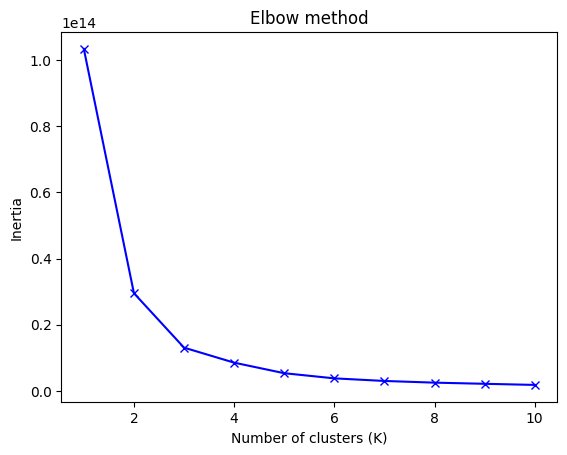

In [11]:
# Find suitable K value by Elbow method on train set
k_values = range(1, 11)
inertia_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x_train)
    inertia_values.append(kmeans.inertia_)

# Draw Elbow curve
plt.plot(k_values, inertia_values, 'bx-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow method')
plt.show()

In [12]:
from sklearn.metrics import silhouette_score

# # Assess the goodness of K-means on the test set using the silhouette index
# best_k = 2  # The K value is selected based on the Elbow curve
# best_kmeans = KMeans(n_clusters=best_k)
# best_kmeans.fit(x_train)
# y_pred = best_kmeans.predict(x_test)
# silhouette = silhouette_score(x_test, y_pred)
# print("K-means silhouette index on the test set:", silhouette)

K-means silhouette index on the test set: 0.651015898111346


In [13]:
from sklearn.metrics import silhouette_score

best_k = 3  # The K value is selected based on the Elbow curve
best_kmeans = KMeans(n_clusters=best_k)
best_kmeans.fit(x_train)
y_pred = best_kmeans.predict(x_test)
silhouette = silhouette_score(x_test, y_pred)
print("K-means silhouette index on the test set:", silhouette)

K-means silhouette index on the test set: 0.6265648549887677


K-means runtime: 1.5588140487670898 s
Accuracy on the train set: 0.25954285714285713
Accuracy on the test set: 0.2562
Report:                precision    recall  f1-score   support

           0       0.15      0.51      0.23      5322
           1       0.13      0.06      0.08      8805
           2       0.55      0.28      0.37     15873

    accuracy                           0.26     30000
   macro avg       0.28      0.28      0.23     30000
weighted avg       0.36      0.26      0.26     30000



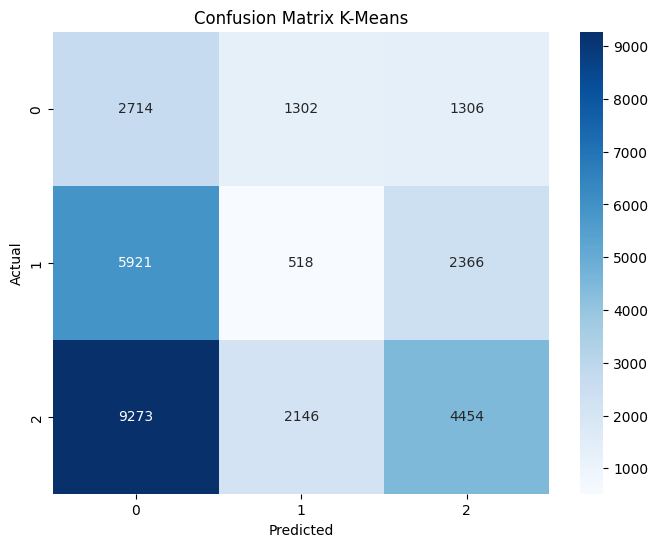

In [19]:
# Train the K-means model on the train set and calculate the running time
k = 3  # Cluster number
kmeans = KMeans(n_clusters=k)
start_kmeans = time.time()
kmeans.fit(x_train)
end_kmeans = time.time()

from sklearn.metrics import accuracy_score
# Predict the label for each data sample in the train and test sets
y_train_pred = kmeans.predict(x_train)
kmeans_pred = kmeans.predict(x_test)

# Calculation of accuracy on train set and test set
train_accuracy_kmeans = accuracy_score(y_train, y_train_pred)
test_accuracy_kmeans = accuracy_score(y_test, kmeans_pred)

# Running time of K-means algorithm on train set
running_time = end_kmeans - start_kmeans
print("K-means runtime:", running_time, "s")
print("Accuracy on the train set:", train_accuracy_kmeans)
print("Accuracy on the test set:", test_accuracy_kmeans)

from sklearn.metrics import classification_report
print("Report: ", classification_report(y_test,kmeans_pred))

# Calculate the confusion matrix
cm_kmeans = pd.crosstab(y_test, kmeans_pred, rownames=['Actual'], colnames=['Predicted'])

# Draw the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_kmeans, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix K-Means')
plt.show()

# Neural network 

Neural Network runtime: 27.543413877487183
Accuracy on the train set: 0.6226285714285714
Accuracy on the test set: 0.6177333333333334
Report:                precision    recall  f1-score   support

           0       0.50      0.62      0.55      5322
           1       0.57      0.63      0.60      8805
           2       0.71      0.61      0.66     15873

    accuracy                           0.62     30000
   macro avg       0.59      0.62      0.60     30000
weighted avg       0.63      0.62      0.62     30000



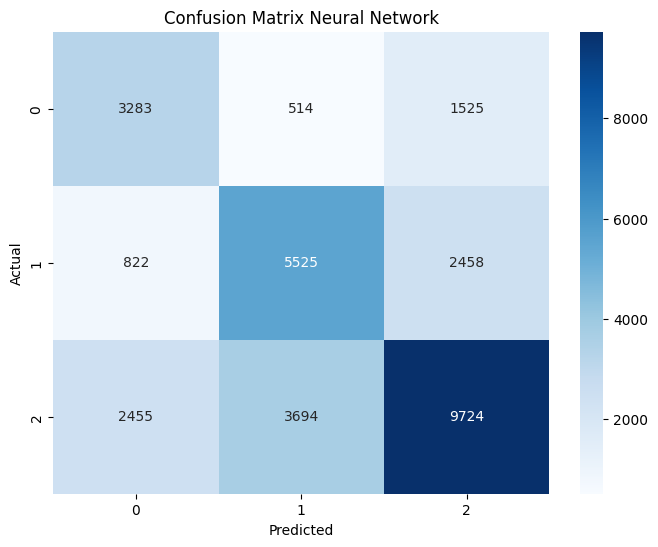

In [16]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import time

# Apply Neural Network algorithm on the training set
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

start_nn = time.time()
mlp.fit(x_train, y_train)
end_nn = time.time()

# Predict the label for each data sample in the train and test sets
y_train_pred = mlp.predict(x_train)
nn_pred = mlp.predict(x_test)

# Calculation of accuracy on train set and test set
train_accuracy_nn = accuracy_score(y_train, y_train_pred)
test_accuracy_nn = accuracy_score(y_test, nn_pred)

print("Neural Network runtime:", end_nn - start_nn)
print("Accuracy on the train set:", train_accuracy_nn)
print("Accuracy on the test set:", test_accuracy_nn)

from sklearn.metrics import classification_report
print("Report: ", classification_report(y_test, nn_pred))

# Calculate the confusion matrix
cm_nn = pd.crosstab(y_test, nn_pred, rownames=['Actual'], colnames=['Predicted'])

# Draw the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Neural Network')
plt.show()